In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn



Импорт данных

In [2]:
def import_dataset_from_file(path_to_file: str) -> pd.DataFrame:
    """
    Функция импортирования исходных данных.
    :param path_to_file: путь к загружаемому файлу;
    :return: структура данных.
    """
    dataset = pd.read_table(path_to_file, delim_whitespace=True, names=['x', 'y', 'z'])

    return dataset

Map_1 = pd.DataFrame(import_dataset_from_file('Map_1.txt'))
Map_2 = pd.DataFrame(import_dataset_from_file('Map_2.txt'))
Map_3 = pd.DataFrame(import_dataset_from_file('Map_3.txt'))
Map_4 = pd.DataFrame(import_dataset_from_file('Map_4.txt'))
Map_5 = pd.DataFrame(import_dataset_from_file('Map_5.txt'))
Point_dataset = pd.DataFrame(import_dataset_from_file('Point_dataset.txt'))

In [3]:
Map_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196495 entries, 0 to 1196494
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1196495 non-null  float64
 1   y       1196495 non-null  float64
 2   z       1196495 non-null  float64
dtypes: float64(3)
memory usage: 27.4 MB


In [4]:

def make_map(dataset):
    x = dataset['x']
    y = dataset['y']
    z = dataset['z']
    plt.scatter(x, y, c=z)
    plt.colorbar(label='z')
    plt.show()

#make_map(Map_1), make_map(Map_2), make_map(Map_3), make_map(Map_4), make_map(Map_5) # долго капец

Map_1 = Map_1.rename(columns={'z': 'z1'})
Map_2 = Map_2.rename(columns={'z': 'z2'})
Map_3 = Map_3.rename(columns={'z': 'z3'})
Map_4 = Map_4.rename(columns={'z': 'z4'})
Map_5 = Map_5.rename(columns={'z': 'z5'})

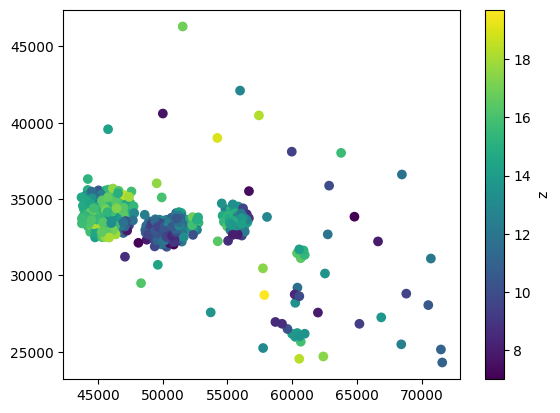

In [5]:
make_map(Point_dataset)

In [6]:
Point_dataset

,x,y,z
0,44222.21,35600.90,14.974396
1,60003.40,26172.72,14.078868
2,44300.61,35291.79,14.261570
3,52776.47,33453.18,15.347562
4,49636.39,30697.34,14.422570
...,...,...,...
436,65193.40,26832.74,9.374795
437,50022.04,40606.42,7.636603
438,43745.18,35114.25,14.622497
439,71483.43,25152.76,11.014532


In [7]:
data = pd.merge(Map_1, Map_2, left_on=['x', 'y'], right_on=['x', 'y'])
data = pd.merge(data, Map_3, left_on=['x', 'y'], right_on=['x', 'y'])
data = pd.merge(data, Map_4, left_on=['x', 'y'], right_on=['x', 'y'])
data = pd.merge(data, Map_5, left_on=['x', 'y'], right_on=['x', 'y'])
print(data)
data1 = pd.merge(data, Point_dataset, how='outer', left_on=['x', 'y'], right_on=['x', 'y']) # это удалить надо будет
print(data1, data1.info())
# data и Point_dataset не имеют пересекающихся точек x, y

                x        y       z1       z2        z3         z4       z5
0        68239.21  24467.0  0.15633  0.11137  40.34349  4142.3389  1.67671
1        68251.71  24467.0  0.15675  0.11094  40.47934  4139.9224  1.67665
2        68264.21  24467.0  0.15718  0.11095  40.69317  4138.2324  1.67664
3        68276.71  24467.0  0.15698  0.11070  40.84084  4138.5000  1.67664
4        68289.21  24467.0  0.15696  0.11088  41.04373  4138.9688  1.67669
...           ...      ...      ...      ...       ...        ...      ...
1196458  53239.21  46942.0  0.16870  0.11056  41.69809  4022.7290  1.67625
1196459  53251.71  46942.0  0.16834  0.11066  37.70777  4022.9558  1.67616
1196460  53264.21  46942.0  0.16873  0.10918  37.66273  4022.3235  1.67590
1196461  53276.71  46942.0  0.16878  0.10950  37.21101  4023.4590  1.67592
1196462  53289.21  46942.0  0.16954  0.10861  40.98548  4016.9272  1.67587

[1196463 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196904 entries, 0 to 

In [8]:
data

,x,y,z1,z2,z3,z4,z5
0,68239.21,24467.0,0.15633,0.11137,40.34349,4142.3389,1.67671
1,68251.71,24467.0,0.15675,0.11094,40.47934,4139.9224,1.67665
2,68264.21,24467.0,0.15718,0.11095,40.69317,4138.2324,1.67664
3,68276.71,24467.0,0.15698,0.11070,40.84084,4138.5000,1.67664
4,68289.21,24467.0,0.15696,0.11088,41.04373,4138.9688,1.67669
...,...,...,...,...,...,...,...
1196458,53239.21,46942.0,0.16870,0.11056,41.69809,4022.7290,1.67625
1196459,53251.71,46942.0,0.16834,0.11066,37.70777,4022.9558,1.67616
1196460,53264.21,46942.0,0.16873,0.10918,37.66273,4022.3235,1.67590
1196461,53276.71,46942.0,0.16878,0.10950,37.21101,4023.4590,1.67592


In [9]:
columns = ['x', 'y', 'z1', 'z2', 'z3', 'z4', 'z5']
for i in columns:
    data[i] = data[i].astype(np.float32)
data

for i in columns:
    print(i,'min', data[i].min(), 'max', data[i].max(), 'median', data[i].median() )
    print('mean', data[i].mean(), 'std', data[i].std())



x min 43839.21 max 72439.21 median 56526.71


mean 57077.184 std 7318.7754
y min 24467.0 max 46942.0 median 33767.0
mean 34368.668 std 5390.9194
z1 min 0.10728 max 0.2996 median 0.15452
mean 0.15573128 std 0.012026057
z2 min 0.07695 max 0.1623 median 0.12236
mean 0.123908356 std 0.0111217555
z3 min 26.05318 max 51.06692 median 37.62269
mean 37.872723 std 2.2727215
z4 min 3461.601 max 4517.0317 median 4189.403
mean 4180.0293 std 64.43013
z5 min 1.66369 max 1.70829 median 1.67706
mean 1.6771472 std 0.0043331175


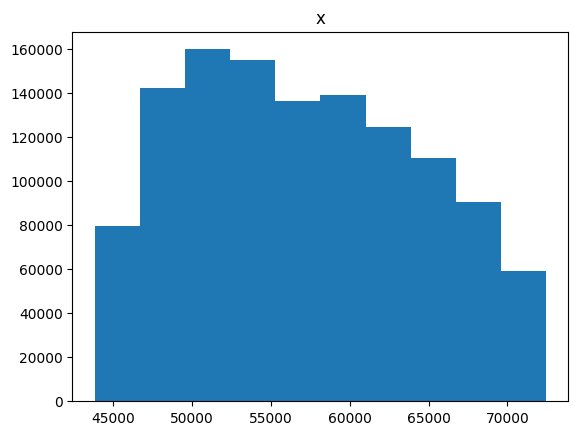

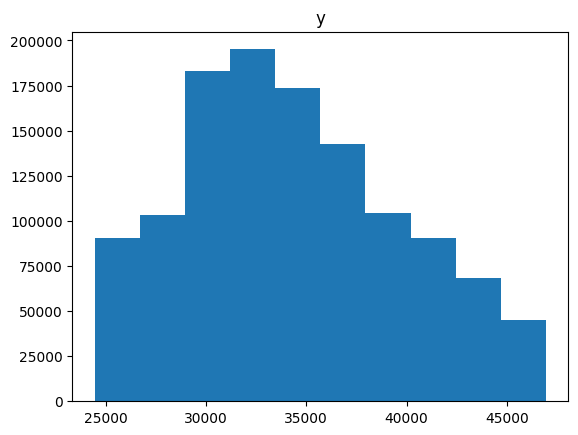

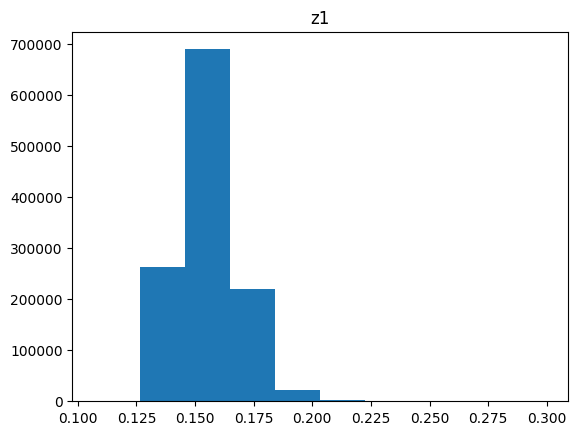

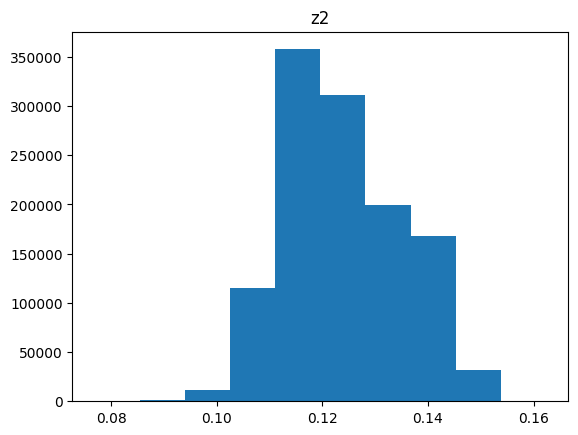

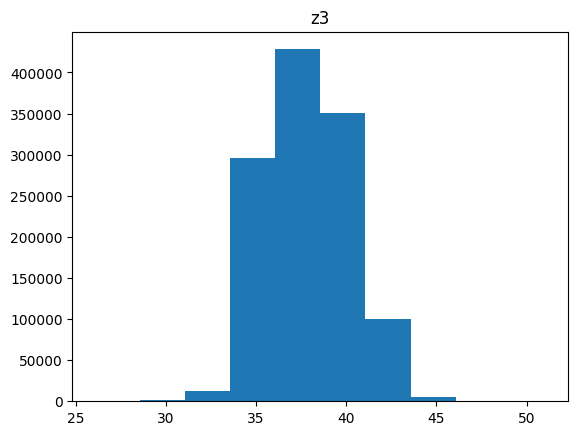

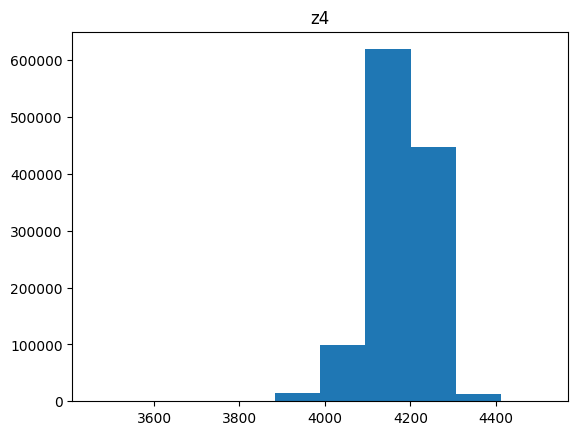

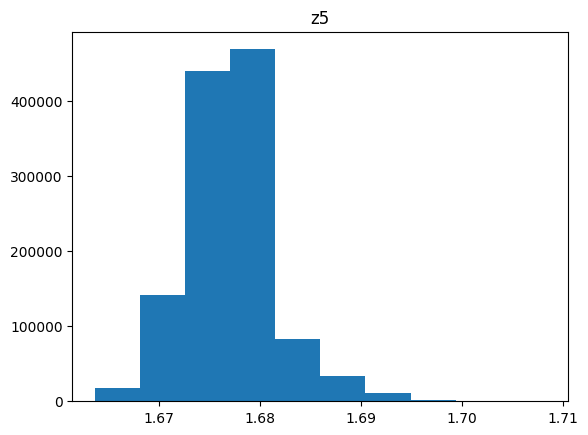

In [10]:
for i in columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()


In [11]:
"""def make_one_map(dataset): 
    x = dataset['x']
    y = dataset['y']
    z1 = dataset['z1']
    z2 = dataset['z2']
    z3 = dataset['z3']
    z4 = dataset['z4']
    z5 = dataset['z5']
    plt.scatter(x, y, c=z1)
    plt.scatter(x, y, c=z2)
    plt.scatter(x, y, c=z3)
    plt.scatter(x, y, c=z4)
    plt.scatter(x, y, c=z5)
    plt.colorbar(label='z')
    plt.show()

make_one_map(data)"""

"def make_one_map(dataset): \n    x = dataset['x']\n    y = dataset['y']\n    z1 = dataset['z1']\n    z2 = dataset['z2']\n    z3 = dataset['z3']\n    z4 = dataset['z4']\n    z5 = dataset['z5']\n    plt.scatter(x, y, c=z1)\n    plt.scatter(x, y, c=z2)\n    plt.scatter(x, y, c=z3)\n    plt.scatter(x, y, c=z4)\n    plt.scatter(x, y, c=z5)\n    plt.colorbar(label='z')\n    plt.show()\n\nmake_one_map(data)"

In [12]:
data['x'], Point_dataset['x'] 

def replace_closest_values(arr1, arr2):
    replaced_arr = np.zeros_like(arr2)

    for i, val in enumerate(arr2):
        closest_val = find_closest_value(val, arr1)
        replaced_arr[i] = closest_val

    return replaced_arr

def find_closest_value(val, arr):
    return arr[np.abs(arr - val).argmin()]



Point_dataset_new_x = replace_closest_values(data['x'], Point_dataset['x'])
Point_dataset_new_y = replace_closest_values(data['y'], Point_dataset['y'])

from sklearn.metrics import r2_score

r2_x = r2_score(Point_dataset['x'], Point_dataset_new_x)
r2_y = r2_score(Point_dataset['y'], Point_dataset_new_y)
r2_x, r2_y

(0.9999982339488196, 0.9999760306402811)

In [13]:
Point_dataset['x'] = Point_dataset_new_x
Point_dataset['y'] = Point_dataset_new_y
Point_dataset

,x,y,z
0,44226.710938,35592.0,14.974396
1,60001.710938,26167.0,14.078868
2,44301.710938,35292.0,14.261570
3,52776.710938,33442.0,15.347562
4,49639.210938,30692.0,14.422570
...,...,...,...
436,65189.210938,26842.0,9.374795
437,50026.710938,40617.0,7.636603
438,43839.210938,35117.0,14.622497
439,71489.210938,25142.0,11.014532


In [14]:
data2 = pd.merge(data, Point_dataset, how='inner', left_on=['x', 'y'], right_on=['x', 'y'])
data2, data2.corr()

(                x        y       z1       z2         z3           z4       z5   
 0    60551.710938  24542.0  0.15961  0.10619  35.078979  4122.215332  1.67992  \
 1    62401.710938  24692.0  0.15494  0.10972  38.560799  4144.411133  1.67982   
 2    68426.710938  25492.0  0.13984  0.12593  36.600670  4248.906738  1.67855   
 3    60664.210938  25667.0  0.15052  0.10564  37.928638  4188.444824  1.68044   
 4    60239.210938  25992.0  0.15246  0.11363  36.912170  4179.922852  1.67824   
 ..            ...      ...      ...      ...        ...          ...      ...   
 427  45789.210938  39567.0  0.14644  0.12014  36.518219  4184.291992  1.67737   
 428  57439.210938  40492.0  0.16472  0.11520  39.768799  4231.928711  1.67986   
 429  50026.710938  40617.0  0.16269  0.13639  41.534500  4174.121582  1.67097   
 430  55976.710938  42117.0  0.15058  0.12066  40.092590  4201.043945  1.67995   
 431  51551.710938  46317.0  0.15970  0.12720  36.588509  4175.951172  1.67742   
 
              

In [15]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

x = data2[columns]
y = data2['z']

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.2)
regr = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=mse)
models, prediction = regr.fit(Xtrain, Xtest, ytrain, ytest)
models

100%|██████████| 42/42 [00:13<00:00,  3.09it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken,mean_squared_error
Model,,,,,
XGBRegressor,0.92,0.93,0.84,1.39,0.71
HistGradientBoostingRegressor,0.91,0.91,0.93,0.44,0.86
LGBMRegressor,0.90,0.90,0.97,0.12,0.94
RandomForestRegressor,0.89,0.90,0.98,0.88,0.96
GradientBoostingRegressor,0.88,0.89,1.04,0.75,1.08
BaggingRegressor,0.88,0.89,1.04,0.22,1.09
ExtraTreesRegressor,0.87,0.88,1.07,0.53,1.14
AdaBoostRegressor,0.85,0.86,1.16,0.29,1.34
KNeighborsRegressor,0.80,0.82,1.35,0.03,1.81


In [16]:
from catboost import CatBoostRegressor
model_cb = CatBoostRegressor()
model_cb.fit(Xtrain, ytrain)
y_model = model_cb.predict(Xtest)
mse(ytest, y_model)

Learning rate set to 0.034606
0:	learn: 2.6752877	total: 83ms	remaining: 1m 22s
1:	learn: 2.6238499	total: 88.5ms	remaining: 44.1s
2:	learn: 2.5668107	total: 93.6ms	remaining: 31.1s
3:	learn: 2.5089796	total: 98ms	remaining: 24.4s
4:	learn: 2.4526552	total: 110ms	remaining: 21.9s
5:	learn: 2.4020231	total: 120ms	remaining: 20s
6:	learn: 2.3502568	total: 129ms	remaining: 18.3s
7:	learn: 2.3022299	total: 142ms	remaining: 17.6s
8:	learn: 2.2533805	total: 151ms	remaining: 16.6s
9:	learn: 2.2083869	total: 159ms	remaining: 15.7s
10:	learn: 2.1623409	total: 170ms	remaining: 15.3s
11:	learn: 2.1215122	total: 177ms	remaining: 14.6s
12:	learn: 2.0782836	total: 183ms	remaining: 13.9s
13:	learn: 2.0406159	total: 190ms	remaining: 13.4s
14:	learn: 2.0009040	total: 194ms	remaining: 12.7s
15:	learn: 1.9655377	total: 199ms	remaining: 12.2s
16:	learn: 1.9327850	total: 203ms	remaining: 11.7s
17:	learn: 1.8937586	total: 207ms	remaining: 11.3s
18:	learn: 1.8585015	total: 212ms	remaining: 10.9s
19:	learn: 1

0.9918574519781536

In [17]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

xgb = XGBRegressor()
pipe = Pipeline([('scaler', StandardScaler()), ('xgb', xgb)])
param_grid = {
    'xgb__n_estimators': [100, 500, 1000, 1500],
    'xgb__learning_rate': [1, 0.1, 0.01],
    'xgb__max_depth': [3, 5, 10]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)

grid_search.fit(Xtrain, ytrain)

print("bes_params:", grid_search.best_params_, '\n'
      'best_score:', grid_search.best_score_)




#estimators = [('xgb', XGBRegressor()), ('hgbr', HistGradientBoostingRegressor())]



bes_params: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 10, 'xgb__n_estimators': 1500} 
best_score: 0.8804732674767994


In [19]:
best_model = grid_search.best_estimator_

f1 = pd.merge(data, Point_dataset, how='left', left_on=['x', 'y'], right_on=['x', 'y'])
#f1.info(), data.info(), Point_dataset.info()
f1_new = f1[f1['z'].isnull()]
f1_new
#~

#f1_new = f1[f1.z == np.nan]
#f1_new = f1.dropna(subset=['z'])
#f1_new['z'].unique()
#f1_nan = f1.drop()
#f1_new = f1_new[f1_new['z'] < 5]
#f1_new.info(), f1_new['z'].unique()
#x = data2[columns]
#y = data2['z']


,x,y,z1,z2,z3,z4,z5,z
0,68239.21,24467.00,0.16,0.11,40.34,4142.34,1.68,NaN
1,68251.71,24467.00,0.16,0.11,40.48,4139.92,1.68,NaN
2,68264.21,24467.00,0.16,0.11,40.69,4138.23,1.68,NaN
3,68276.71,24467.00,0.16,0.11,40.84,4138.50,1.68,NaN
4,68289.21,24467.00,0.16,0.11,41.04,4138.97,1.68,NaN
...,...,...,...,...,...,...,...,...
1196458,53239.21,46942.00,0.17,0.11,41.70,4022.73,1.68,NaN
1196459,53251.71,46942.00,0.17,0.11,37.71,4022.96,1.68,NaN
1196460,53264.21,46942.00,0.17,0.11,37.66,4022.32,1.68,NaN
1196461,53276.71,46942.00,0.17,0.11,37.21,4023.46,1.68,NaN


In [22]:
X = f1_new[columns]
y = f1['z']
y = best_model.predict(X)
y

array([13.532863 , 13.5328665, 13.519787 , ..., 15.48214  , 15.48214  ,
       15.51231  ], dtype=float32)

In [36]:
X

,x,y,z1,z2,z3,z4,z5
0,68239.21,24467.00,0.16,0.11,40.34,4142.34,1.68
1,68251.71,24467.00,0.16,0.11,40.48,4139.92,1.68
2,68264.21,24467.00,0.16,0.11,40.69,4138.23,1.68
3,68276.71,24467.00,0.16,0.11,40.84,4138.50,1.68
4,68289.21,24467.00,0.16,0.11,41.04,4138.97,1.68
...,...,...,...,...,...,...,...
1196458,53239.21,46942.00,0.17,0.11,41.70,4022.73,1.68
1196459,53251.71,46942.00,0.17,0.11,37.71,4022.96,1.68
1196460,53264.21,46942.00,0.17,0.11,37.66,4022.32,1.68
1196461,53276.71,46942.00,0.17,0.11,37.21,4023.46,1.68


In [33]:
y = pd.DataFrame(y.reshape(-1, 1))
y

,0
0,13.53
1,13.53
2,13.52
3,13.53
4,13.53
...,...
1196026,16.41
1196027,16.39
1196028,15.48
1196029,15.48


In [44]:
F1 = pd.concat([X, y], axis=1)
F1 = F1[~F1[0].isnull()]

F1 = F1.to_csv('F1.csv')
F1

In [45]:
F1